In [ ]:
import numpy as np #for working with arrays
import pandas as pd #data processing, csv read
import matplotlib.pyplot as plt #to plot charts
%matplotlib inline
import seaborn as sns #for data visualization
import warnings #avoid warnings
warnings.filterwarnings('ignore')

#load the dataset
ds = pd.read_csv('diabetes.csv')

# Data Handling

# Understanding the dataset, it includes :
*   head
*   shape
*   data types
*   types of columns
*   information about the data
*   summary of the data


In [ ]:
ds.head() #displays first 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
ds.shape #number of rows (768) and columns (9)

(768, 9)

In [ ]:
ds.columns #the corresponding columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
ds.dtypes #the types of the data

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
ds.info() # used to get a concise summary of a DataFrame.
#It comes in handy when doing exploratory analysis of the data.
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
ds.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# DATA CLEANING :
as some of the columns consist 0 values which is impossible in the case of diabetes recognition, removal of those values is needed.

*   Drop duplicate values
*   Check null values
*   Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.


In [ ]:
ds = ds.drop_duplicates() #dropping duplicate values if any

In [ ]:
#checking missing values if any
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace
print(ds[ds['BloodPressure']==0].shape[0])
print(ds[ds['Glucose']==0].shape[0])
print(ds[ds['SkinThickness']==0].shape[0])
print(ds[ds['Insulin']==0].shape[0])
print(ds[ds['BMI']==0].shape[0])

35
5
227
374
11


In [ ]:
#replacing 0 values with median of that column
ds['Glucose']=ds['Glucose'].replace(0,ds['Glucose'].mean())#normal distribution
ds['BloodPressure']=ds['BloodPressure'].replace(0,ds['BloodPressure'].mean())#normal distribution
ds['SkinThickness']=ds['SkinThickness'].replace(0,ds['SkinThickness'].median())#skewed distribution
ds['Insulin']=ds['Insulin'].replace(0,ds['Insulin'].median())#skewed distribution
ds['BMI']=ds['BMI'].replace(0,ds['BMI'].median())#skewed distribution

ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# DATA VISUALIZATION
1.   Count plot - to see if the data is balanced or not
2.   Histograms - to see if the data is normally distributed or skewed
3.   Box Plot - to analyze the distribution and the outliers
4.   Scatter plot - to understand the relationship between two vatiables
5.   Pair plot - to create scatter plot with all the variables



<Axes: xlabel='Outcome', ylabel='count'>

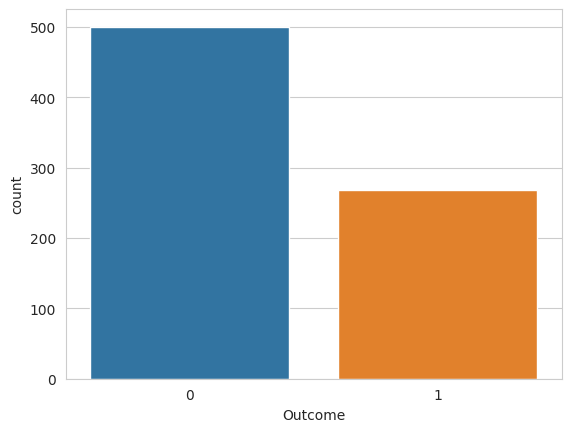

In [ ]:
sns.countplot(x='Outcome', data=ds) #data is imbalanced as no. of non-diabetic is more than no. of diabetic

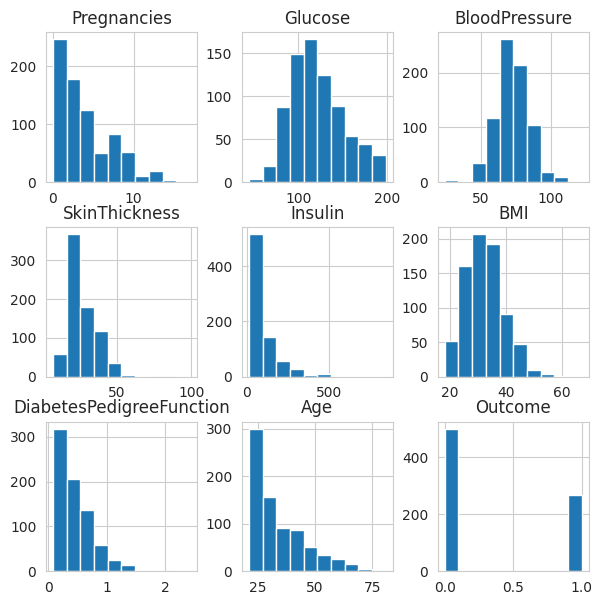

In [ ]:
#histogram for each feature
ds.hist(bins=10, figsize=(7,7))
plt.show() #only glucose and bloodpressure are normally distributed

<Axes: xlabel='DiabetesPedigreeFunction'>

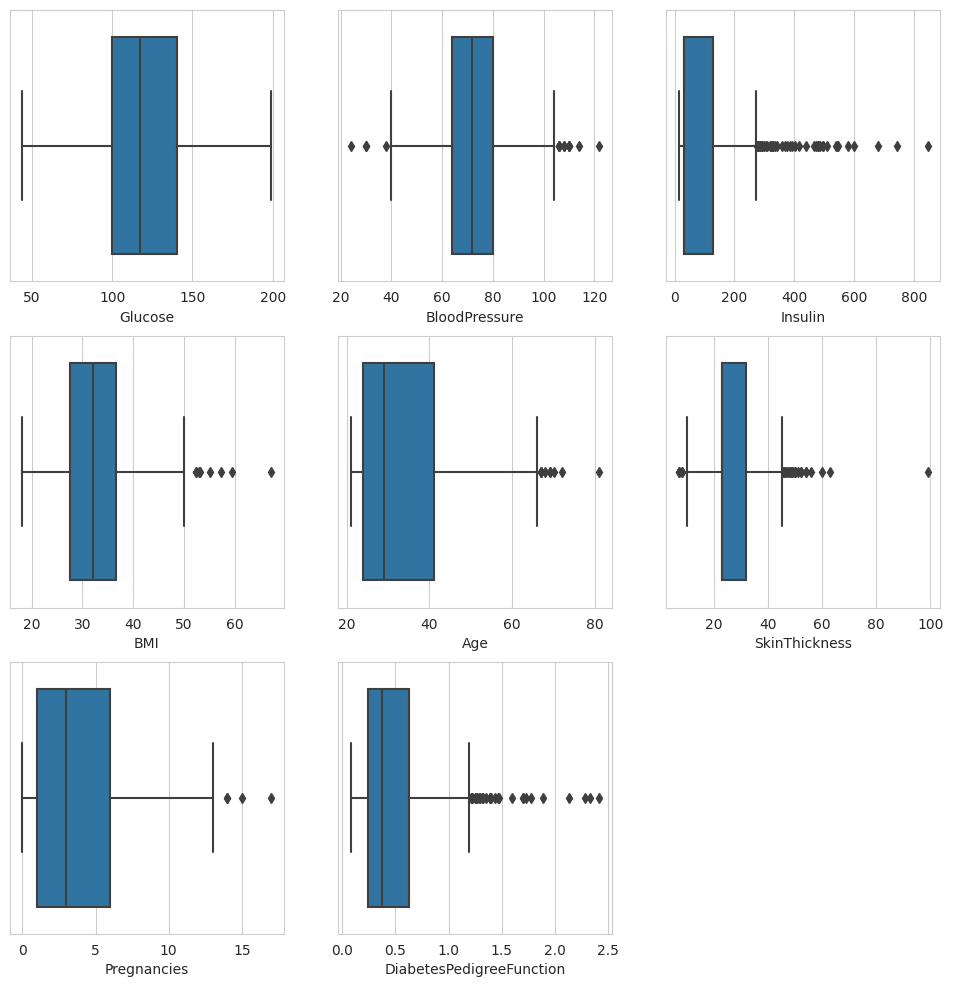

In [ ]:
#box plot
plt.figure(figsize=(12,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=ds)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=ds)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=ds)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=ds)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=ds)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=ds)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=ds)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=ds)

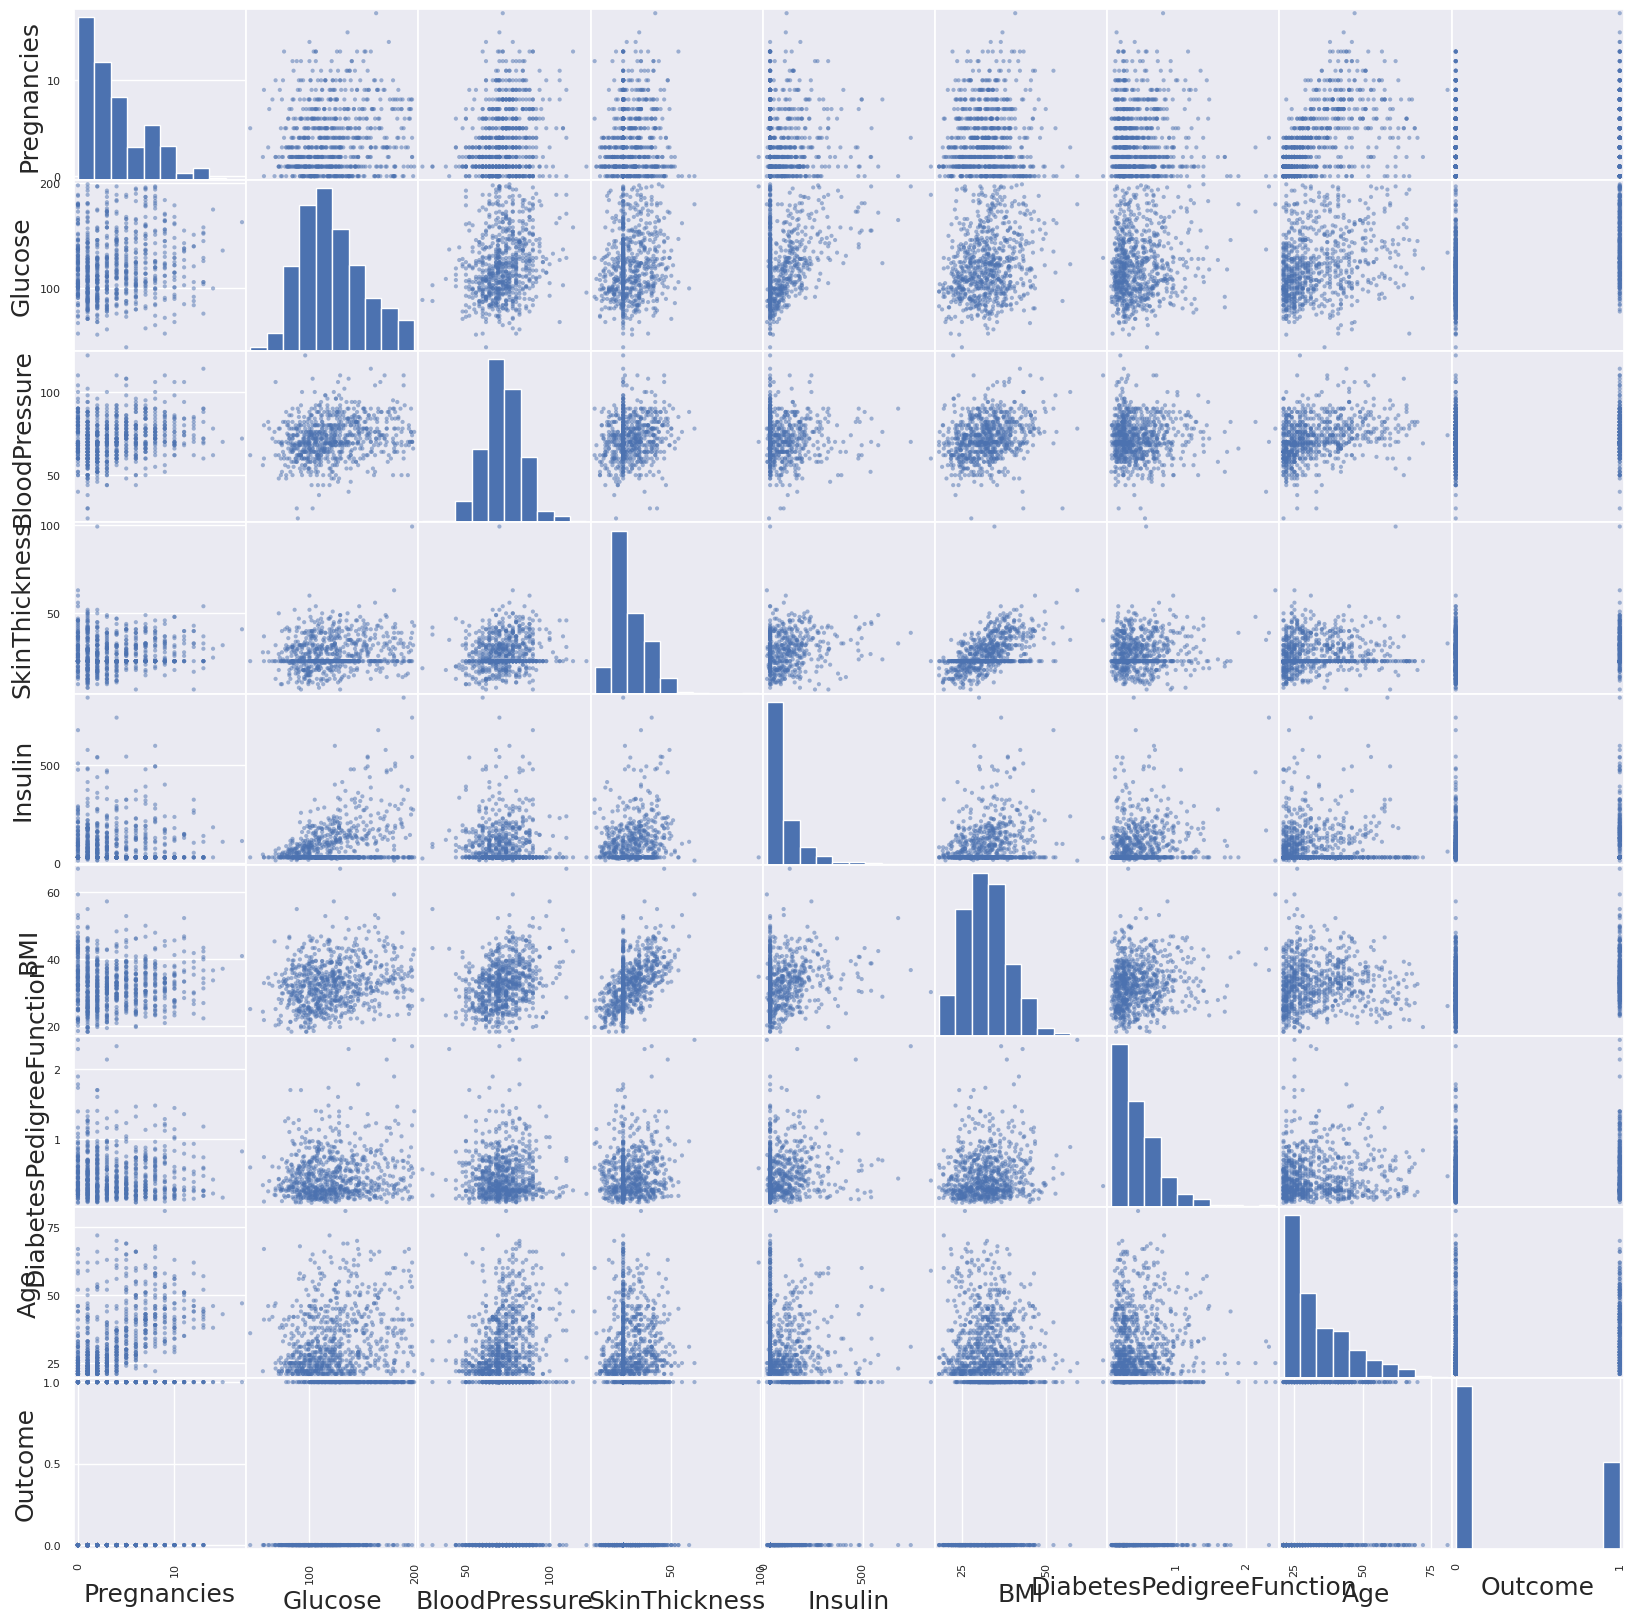

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds,figsize=(20, 20));

<Axes: >

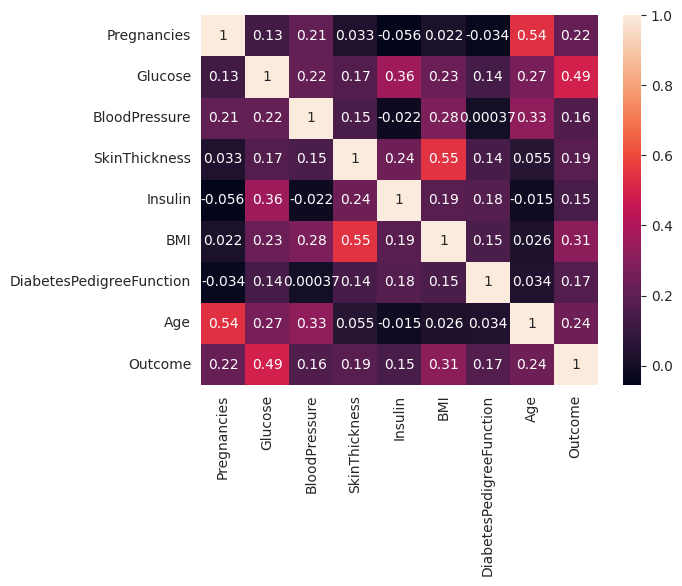

In [ ]:
# FEATURE COLLECTION
#pearson's correlation coefficient

dscorr = ds.corr()
sns.heatmap(dscorr, annot=True)

In [ ]:
#as per the heatmap glucose, BMI, age are mostly correlated with the outcome and BP, Insulin, DiabetesPedigreeFunction are least correlated. so we can drop them
ds_selected = ds.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis = 'columns')

# Handling Outliers

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=ds_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
ds_new=quantile.transform(X)
ds_new=pd.DataFrame(X)
ds_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
ds_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

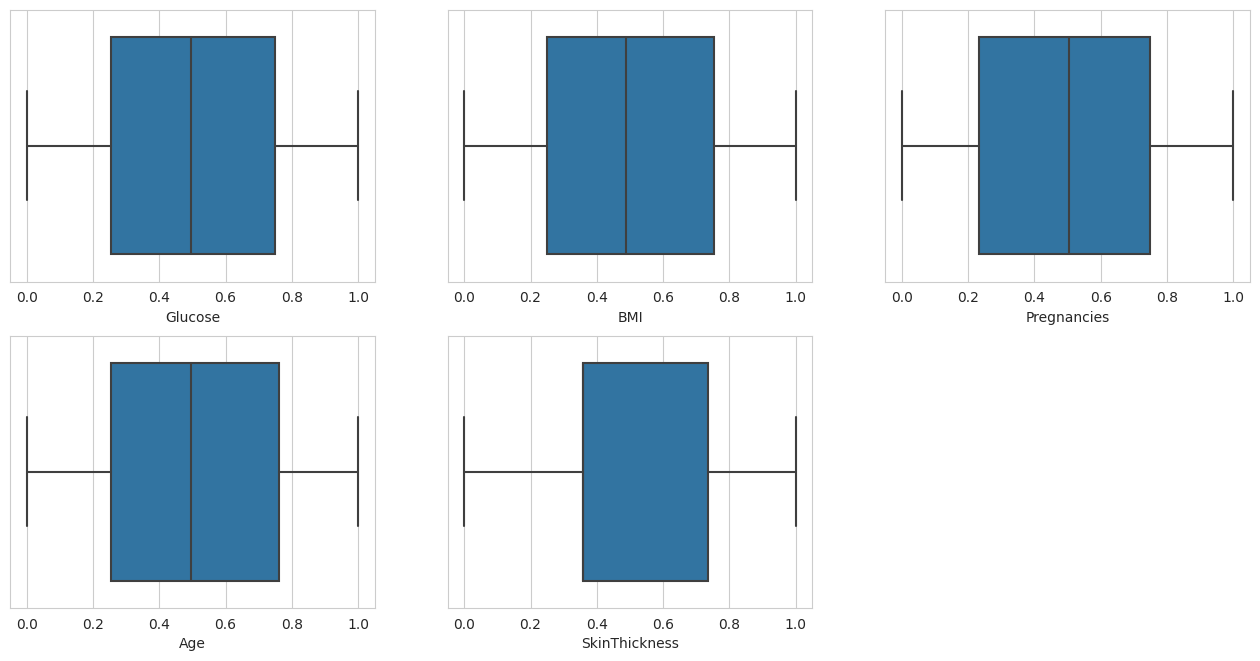

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=ds_new['Glucose'],data=ds_new)
plt.subplot(3,3,2)
sns.boxplot(x=ds_new['BMI'],data=ds_new)
plt.subplot(3,3,3)
sns.boxplot(x=ds_new['Pregnancies'],data=ds_new)
plt.subplot(3,3,4)
sns.boxplot(x=ds_new['Age'],data=ds_new)
plt.subplot(3,3,5)
sns.boxplot(x=ds_new['SkinThickness'],data=ds_new)

# SPLIT THE DATA

In [ ]:
trgt = 'Outcome'
y = ds_new[trgt] #given predictions - training data
X = ds_new.drop(trgt, axis = 1) #dropping the outcome column and keeping rest of the cols

In [ ]:
X.head() #carries all the independent features

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
y.head() #carries the dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [ ]:
X_test.shape,y_test.shape

((154, 5), (154,))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100) #It adds a small value (smoothing factor) to the variance of each feature, effectively preventing variance from being exactly zero.
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model = nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
nb_pred = best_model.predict(X_test)

Classification Report:
               precision    recall  f1-score     support
0.0            0.808696  0.869159  0.837838  107.000000
1.0            0.641026  0.531915  0.581395   47.000000
accuracy       0.766234  0.766234  0.766234    0.766234
macro avg      0.724861  0.700537  0.709617  154.000000
weighted avg   0.757524  0.766234  0.759573  154.000000

 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<Axes: >

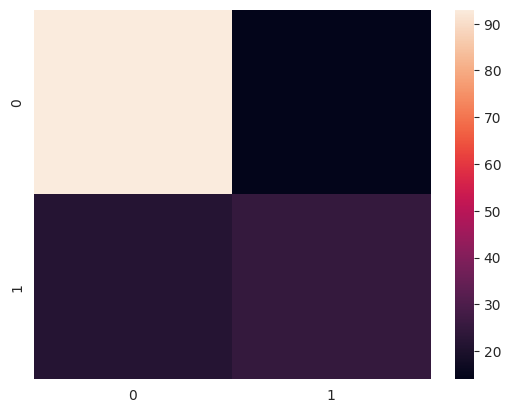

In [ ]:
print("Classification Report:\n", pd.DataFrame(classification_report(y_test,nb_pred, output_dict = True)).transpose())
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

In [ ]:
nbConfusion = confusion_matrix(y_test, nb_pred)
nbConfusion

array([[93, 14],
       [22, 25]])

<Axes: >

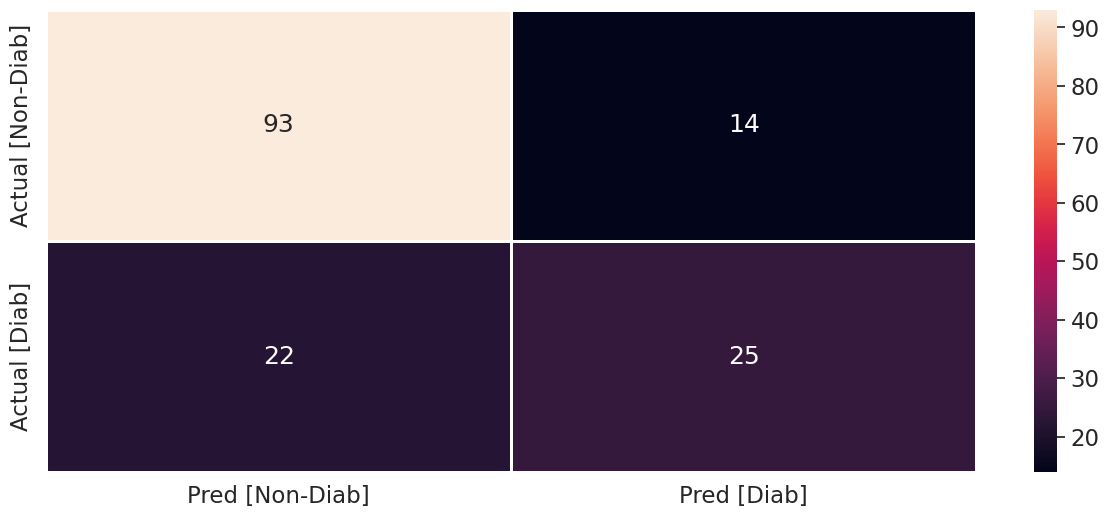

In [ ]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

The ROC score ranges from 0 to 1, with 0 indicating a poor classifier (classifies all instances incorrectly) and 1 indicating a perfect classifier (classifies all instances correctly). A higher ROC score indicates better performance.

In [ ]:
nb_Roc_Auc = roc_auc_score(y_test,nb_pred)
print ('Roc Auc Score: ', nb_Roc_Auc)

Roc Auc Score:  0.7005368860608471


In [ ]:
nb_pred_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, nb_pred_prob)

The ROC curve is a graphical representation of the classifier's performance at different discrimination thresholds. It plots the true positive rate (TPR or sensitivity) on the y-axis against the false positive rate (FPR or 1-specificity) on the x-axis, where:
TPR (True Positive Rate) = True Positives / (True Positives + False Negatives)
FPR (False Positive Rate) = False Positives / (False Positives + True Negatives)

A perfect classifier would have a ROC curve that passes through the top-left corner of the plot (TPR=1, FPR=0), while a random classifier would have a diagonal line from the bottom-left to the top-right (indicating equal chances of true positive and false positive rates).

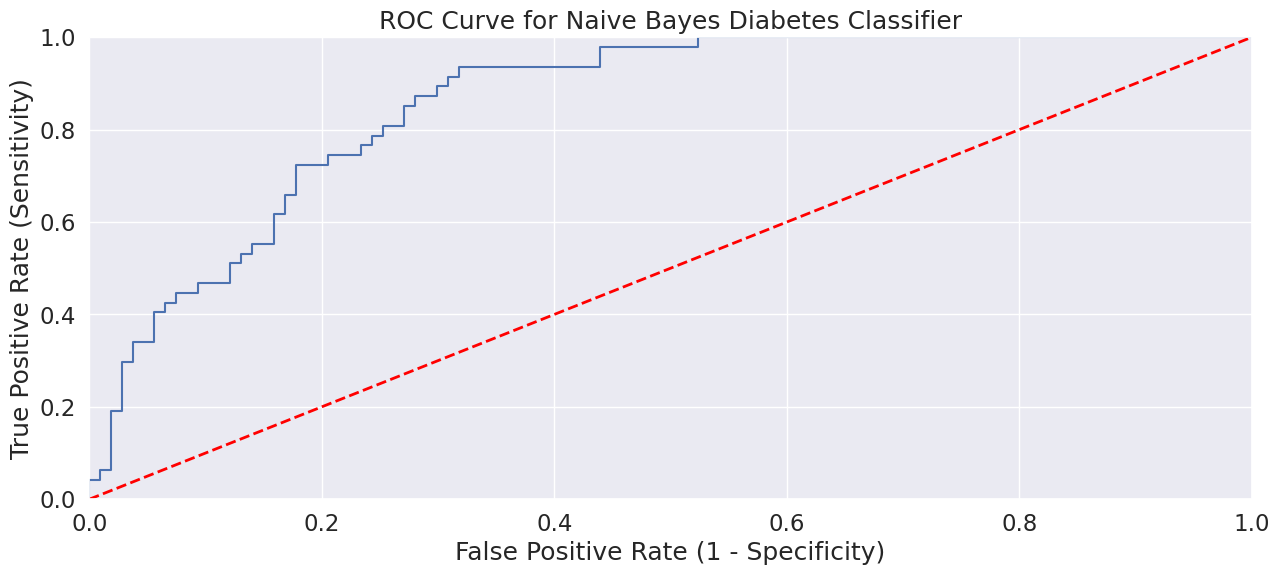

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
plt.plot(fpr, tpr)
plt.title('ROC Curve for Naive Bayes Diabetes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')